In [34]:
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


In [36]:
# path to the database - change it if needed
path = 'face_data/face_data/' 

ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png

# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)

h = im.shape[0] # hight 
w = im.shape[1] # width

D = h * w
N = len(states)*15 
print("N:", N,"D:", D,"h:", h,"w:", w)

X = np.zeros((D, N))
Y = np.zeros(N)

# collect all data
count = 0 

# there are 15 people
for person_id in range(1, 16):
    for state in states:
        
        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        
        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        
        # then add image to dataset X
        X[:, count] = tmp.reshape(D)
        Y[count] = states.index(state)
        
        count += 1 
Y = Y.astype(int)

# Reshape X to (N, h, w, 1) for CNN
X = X.T.reshape(-1, h, w, 1)

# Normalize the pixel values to be between 0 and 1
X = X / 255.0

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

N: 165 D: 77760 h: 243 w: 320
Training data shape: (132, 243, 320, 1)
Testing data shape: (33, 243, 320, 1)


In [39]:
from tensorflow.keras import layers

def create_model():
    model = keras.Sequential([
        layers.Input(shape=(243, 320, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'), 
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(len(states), activation='softmax')  # Output layer for multi-class classification
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 241, 318, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 120, 159, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 118, 157, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 59, 78, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 57, 76, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 28, 38, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 136192)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │    17,432,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,526,795 (66.86 MB)

 Trainable params: 17,526,795 (66.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 316ms/step - accuracy: 0.9392 - loss: 0.2331 - val_accuracy: 0.1515 - val_loss: 5.0225
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 0.9569 - loss: 0.1564 - val_accuracy: 0.1515 - val_loss: 5.8567
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 471ms/step - accuracy: 0.9484 - loss: 0.1318 - val_accuracy: 0.1515 - val_loss: 6.3459
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - accuracy: 0.9442 - loss: 0.1226 - val_accuracy: 0.1515 - val_loss: 6.3661
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 327ms/step - accuracy: 0.9406 - loss: 0.1308 - val_accuracy: 0.1818 - val_loss: 5.6257
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 359ms/step - accuracy: 0.9469 - loss: 0.0937 - val_accuracy: 0.1818 - val_loss: 6.0098
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 429ms/step - accuracy: 0.9436 - loss: 0.0857 - val_accuracy: 0.2121 - val_loss: 6.7927
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 427ms/step - accuracy: 0.9464 - loss: 0.1037 - val_accuracy: 0

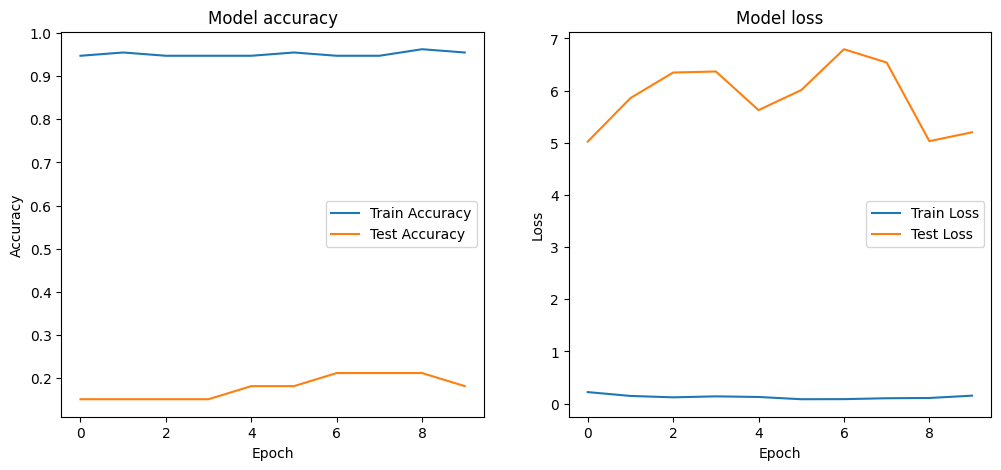

In [45]:
# Fit the model
history = model.fit(X_train, Y_train, epochs=10, steps_per_epoch=20, batch_size=16, validation_data=(X_test, Y_test))

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict on train and test data
train_predictions = model.predict(X_train)
train_pred_classes = np.argmax(train_predictions, axis=1)

test_predictions = model.predict(X_test)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Calculate accuracy, precision, and recall
train_accuracy = accuracy_score(Y_train, train_pred_classes)
test_accuracy = accuracy_score(Y_test, test_pred_classes)

train_precision = precision_score(Y_train, train_pred_classes, average='weighted', zero_division=0)
test_precision = precision_score(Y_test, test_pred_classes, average='weighted', zero_division=0)

train_recall = recall_score(Y_train, train_pred_classes, average='weighted', zero_division=0)
test_recall = recall_score(Y_test, test_pred_classes, average='weighted', zero_division=0)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
print("Training Precision:", train_precision)
print("Validation Precision:", test_precision)
print("Training Recall:", train_recall)
print("Validation Recall:", test_recall)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 412ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
Training Accuracy: 0.9621212121212122
Validation Accuracy: 0.18181818181818182
Training Precision: 0.9638694638694638
Validation Precision: 0.2727272727272727
Training Recall: 0.9621212121212122
Validation Recall: 0.18181818181818182


Accuracy
- Training Accuracy: 0.9621: Điều này có nghĩa là mô hình đã phân loại chính xác khoảng 96.21% các mẫu trong tập huấn luyện. Đây là một mức độ chính xác cao, cho thấy mô hình có khả năng học tốt từ dữ liệu huấn luyện.
- Validation Accuracy: 0.1818: Mô hình chỉ đạt được 18.18% độ chính xác trên tập kiểm tra (validation). Đây là một chỉ số rất thấp, cho thấy rằng mô hình không hoạt động tốt trên dữ liệu chưa thấy trước đó.

Precision
- Training Precision: 0.9639: Precision là tỷ lệ giữa số lượng dự đoán đúng (true positives) và tổng số dự đoán mà mô hình đã đưa ra là dương (true positives + false positives). Một precision cao trên tập huấn luyện (96.39%) cho thấy mô hình có khả năng dự đoán đúng các lớp tích cực tốt.
- Validation Precision: 0.2727: Precision trên tập kiểm tra chỉ là 27.27%, cho thấy mô hình gặp khó khăn trong việc phân loại đúng các lớp tích cực khi đối mặt với dữ liệu mới.

Recall
- Training Recall: 0.9621: Recall (hoặc sensitivity) là tỷ lệ giữa số lượng dự đoán đúng và tổng số mẫu thực sự dương trong tập dữ liệu (true positives / (true positives + false negatives)). Một recall cao trên tập huấn luyện (96.21%) cho thấy mô hình nhận diện tốt các mẫu dương trong tập huấn luyện.
- Validation Recall: 0.1818: Recall thấp trên tập kiểm tra (18.18%) cho thấy mô hình đã bỏ lỡ rất nhiều mẫu tích cực khi dự đoán trên dữ liệu mới.

SO SÁNH CNN VÀ ANN

Kết quả của mô hình CNN:
- Training Accuracy: 0.9621: Mô hình CNN đạt độ chính xác 96.21% trên tập huấn luyện.
- Validation Accuracy: 0.1818: Mô hình CNN chỉ đạt 18.18% độ chính xác trên tập kiểm tra.

Kết quả của mô hình ANN:
- Train Accuracy on test data: 0.22: Độ chính xác của mô hình ANN trên tập huấn luyện chỉ đạt 22%.
- Test Accuracy on test data: 0.22: Độ chính xác của mô hình ANN trên tập kiểm tra cũng chỉ đạt 22%.

Kết luận:
- Mô hình CNN có hiệu suất học tốt hơn so với mô hình ANN, nhưng cần được cải thiện để tránh overfitting. Cả hai mô hình đều cần cải thiện để đạt được độ chính xác tốt hơn trên tập kiểm tra, nhưng CNN vẫn là lựa chọn tốt hơn cho các bài toán phân loại hình ảnh. Việc điều chỉnh mô hình CNN, như thêm dropout layers hoặc tăng cường dữ liệu, có thể giúp cải thiện khả năng tổng quát.